In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from scipy import stats

In [ ]:
#Display options
pd.set_option('display.max_columns', 50)

#### Import Data Set

In [ ]:
# Upload the dataset
print("Please upload the nightclub dataset.")
uploaded = files.upload()
nightclub_df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

Please upload the nightclub dataset.


Saving Nightclub.csv to Nightclub.csv


#### Check for and Clean Missing Values

In [ ]:
#Dataset info
nightclub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerType         250 non-null    object 
 1   Pricing_Strategy     250 non-null    object 
 2   Fair1                250 non-null    float64
 3   Fair2                250 non-null    float64
 4   Fair3                250 non-null    float64
 5   WOM_1                250 non-null    float64
 6   WOM_2                250 non-null    float64
 7   WOM_3                250 non-null    float64
 8   RI_1                 250 non-null    float64
 9   RI_2                 250 non-null    float64
 10  RI_3                 250 non-null    float64
 11  FAM1                 250 non-null    float64
 12  FAM2                 250 non-null    float64
 13  Nightclub_Frequency  250 non-null    object 
 14  Gender               250 non-null    object 
 15  Age                  249 non-null    flo

In [ ]:
#Note that there is only 1 non-null value in the entire dataset, so we will just throw out the row, as it should have little to no effect on our overall analysis
nightclub_df = nightclub_df.dropna()
#We also look at the value counts of each column, to see if there are other missing value placeholders
for label in nightclub_df.columns:
  print(nightclub_df[label].value_counts())
  print('\n')

CustomerType
Frequent customer      125
First time customer    124
Name: count, dtype: int64


Pricing_Strategy
Time of a day             50
VIP entrance              50
Reservation in advance    50
Day of the week           50
Flat pricing              49
Name: count, dtype: int64


Fair1
6.0    77
5.0    57
4.0    32
7.0    27
2.0    22
3.0    22
1.0    12
Name: count, dtype: int64


Fair2
6.0    65
5.0    50
4.0    43
7.0    35
3.0    25
2.0    24
1.0     7
Name: count, dtype: int64


Fair3
5.0    68
6.0    68
7.0    31
4.0    30
2.0    25
3.0    22
1.0     5
Name: count, dtype: int64


WOM_1
6.0    66
4.0    65
5.0    54
2.0    25
3.0    19
7.0    13
1.0     7
Name: count, dtype: int64


WOM_2
6.0    68
5.0    59
4.0    57
2.0    28
3.0    17
7.0    17
1.0     3
Name: count, dtype: int64


WOM_3
6.0    67
5.0    55
4.0    54
2.0    31
3.0    19
7.0    18
1.0     5
Name: count, dtype: int64


RI_1
6.0    84
5.0    57
4.0    34
7.0    22
2.0    21
3.0    21
1.0    10
Name: count, dty

#### Encoding Categorical Data, and Normalize DataFrame

In [ ]:
encoded_df = nightclub_df.copy(deep=True)

In [ ]:
##Categorical Encoding Strategies
#Customer Type - Binary
#Pricing_Strategy - One Hot Encoding
#Nightclub_Frequency - Ranking Variable
#Gender - Binary
#Ethnicity - One Hot Encoding
#Income - Min of each Bracket
#Employment - One Hot Encoding
#Education - Ranking Variable

In [ ]:
#Nightclub_Frequency - Ranking Variable
encoded_df['Nightclub_Frequency'] = encoded_df['Nightclub_Frequency'].map({'Less than Once a Month': 0,
                                                                           'Once a Month': 1,
                                                                           '2-3 Times a Month': 2,
                                                                           'Once a Week': 3,
                                                                           '2-3 Times a Week': 4,
                                                                           'Daily': 5})

In [ ]:
#Income - Min of Each Bracket
encoded_df['Income'] = encoded_df['Income'].map({'under $20.000': 0,
                                                 '$20.000 - $49.999': 20000,
                                                 '$50.000 - $79.999': 50000,
                                                 '$80.000 - $99.999': 80000,
                                                 '$100.000 or over': 100000})

In [ ]:
#Education - Ranking Variable
encoded_df['Education'] = encoded_df['Education'].map({'Some high school': 0,
                                                       'High school diploma': 1,
                                                       'Some college': 2,
                                                       'Bachelor’s degree': 3,
                                                       'Some graduate school': 4,
                                                       'Master’s degree': 5,
                                                       'Doctoral degree': 6})

In [ ]:
#Do the Binary/One Hot Encoding Like a NOT idiot

In [ ]:
#First 5 Rows of Encoded DataFrame
encoded_df.head()

,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,Frequent customer,Time of a day,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,3,Male,21.0,caucasian,50000,Student,2
1,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,1,Female,35.0,other,0,Retired,2
2,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,1,Female,26.0,pacific islander,0,Retired,2
3,Frequent customer,Flat pricing,4.0,3.0,2.0,3.0,3.0,1.0,5.0,3.0,5.0,3.0,3.0,2,Male,27.0,hispanic,50000,Full time employed,3
4,First time customer,Flat pricing,5.0,6.0,5.0,1.0,2.0,1.0,2.0,3.0,4.0,5.0,5.0,0,Male,54.0,caucasian,0,Student,2


In [ ]:
##Create Custom Distance Function
from sklearn.metrics import pairwise_distances
def kprotoDistance(x, y):
  categorical_cols = ['CustomerType', 'Pricing_Strategy', 'Gender', 'Ethnicity', 'Employment_status']
  x_num = np.array(x.drop(columns=categorical_cols))
  x_cat = np.array(x[categorical_cols])
  y_num = np.array(y.drop(columns=categorical_cols))
  y_cat = np.array(y[categorical_cols])
  euclidean = np.sqrt(np.sum((x_num - y_num) ** 2))
  dissim = np.sum(x_cat != y_cat)
  return euclidean + 0.5*dissim
def kprotoDist(X):
  return pairwise_distances(X, metric=kprotoDistance)

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
categorical_cols = ['CustomerType', 'Pricing_Strategy', 'Gender', 'Ethnicity', 'Employment_status']
numeric_cols = encoded_df.drop(columns=categorical_cols).columns
categorical_indices = [encoded_df.columns.get_loc(col) for col in categorical_cols]

scaler = StandardScaler()

# Normalize the numeric columns using their names (not indices)
scaled_df = encoded_df.copy(deep=True)
scaled_df[numeric_cols] = scaler.fit_transform(encoded_df.drop(columns=categorical_cols))
scaled_df

,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,Frequent customer,Time of a day,-1.670740,-1.696406,-1.818292,-2.396881,-2.503050,-2.339961,-1.759293,-0.947391,-2.399750,-1.307140,-1.183351,0.629048,Male,-0.944737,caucasian,0.319477,Student,-0.211032
1,Frequent customer,VIP entrance,-2.275412,-2.309476,-2.457776,-2.396881,-2.503050,-2.339961,-2.388695,-2.280162,-2.399750,-0.161091,-0.544188,-0.921774,Female,0.190119,other,-0.976123,Retired,-0.211032
2,Frequent customer,VIP entrance,-2.275412,-2.309476,-2.457776,-2.396881,-2.503050,-2.339961,-2.388695,-2.280162,-2.399750,-0.161091,-0.544188,-0.921774,Female,-0.539431,pacific islander,-0.976123,Retired,-0.211032
3,Frequent customer,Flat pricing,-0.461396,-1.083336,-1.818292,-1.043540,-1.134752,-2.339961,0.128914,-0.947391,0.162041,-0.734115,-0.544188,-0.146363,Male,-0.458370,hispanic,0.319477,Full time employed,0.819302
4,First time customer,Flat pricing,0.143276,0.755873,0.100160,-2.396881,-1.818901,-2.339961,-1.759293,-0.947391,-0.478407,0.411933,0.734140,-1.697185,Male,1.730281,caucasian,-0.976123,Student,-0.211032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Frequent customer,VIP entrance,1.352619,0.755873,0.739644,0.986471,1.601842,1.570444,0.758316,1.051765,0.802489,0.984957,-0.544188,0.629048,Male,-0.863676,caucasian,-0.457883,Full time employed,-0.211032
246,Frequent customer,Flat pricing,1.352619,1.368943,1.379128,1.663142,1.601842,1.570444,1.387718,1.718151,1.442937,1.557982,2.012467,0.629048,Male,-0.458370,caucasian,-0.976123,Student,-0.211032
247,Frequent customer,Flat pricing,0.143276,0.142803,0.100160,1.663142,1.601842,1.570444,1.387718,1.718151,1.442937,1.557982,1.373304,0.629048,Male,-0.215186,hispanic,-0.457883,Full time employed,-1.241366
248,Frequent customer,Flat pricing,0.747947,0.755873,0.739644,1.663142,1.601842,1.570444,1.387718,1.718151,1.442937,1.557982,2.012467,0.629048,Male,-0.944737,caucasian,-0.976123,Student,-0.211032


In [ ]:
import contextlib

In [ ]:
costs = []

# Try different numbers of clusters
for n_clusters in range(2, 11):
    with contextlib.redirect_stdout(None):
        kproto = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=2, random_state=479)
        clusters = kproto.fit_predict(scaled_df, categorical=categorical_indices)

    # Calculate the silhouette score
    costs.append(kproto.cost_)


In [ ]:
best_silhouette_score = -1
best_n_clusters = 0
best_clusters = None

# Try different numbers of clusters (e.g., 2 to 10 clusters)
for n_clusters in range(2, 11):
    kproto = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=2)
    clusters = kproto.fit_predict(scaled_df, categorical=categorical_indices)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_df, clusters)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

    # Update best silhouette score and cluster labels
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters
        best_clusters = clusters

print(f"Best number of clusters: {best_n_clusters}, Best Silhouette Score: {best_silhouette_score}")

# Add the best cluster labels to the DataFrame
encoded_df['Best_Cluster_Labels'] = best_clusters

# Perform PCA for visualization (reduce to 2 principal components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_numeric_df)

# Add PCA results to the DataFrame for plotting
encoded_df['PC1'] = pca_result[:, 0]
encoded_df['PC2'] = pca_result[:, 1]

# Plot the clusters with the best silhouette score
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df['PC1'], encoded_df['PC2'], c=encoded_df['Best_Cluster_Labels'], cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Best K-Prototypes Clusters (PCA Projection), n_clusters={best_n_clusters}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

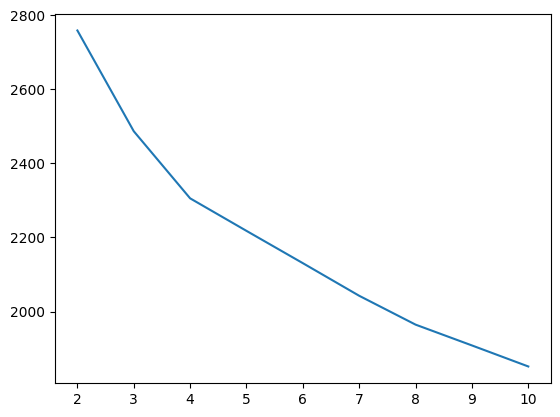

In [ ]:
sns.lineplot(x=list(range(2,11)), y=costs)
plt.show()




In [ ]:
kproto = KPrototypes(n_clusters=4, init='Huang', n_init=5, verbose=2)
clusters = kproto.fit_predict(scaled_df, categorical=categorical_indices)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 59, ncost: 2405.2734241205208
Run: 1, iteration: 2/100, moves: 38, ncost: 2332.4383563308115
Run: 1, iteration: 3/100, moves: 14, ncost: 2320.9543337569207
Run: 1, iteration: 4/100, moves: 1, ncost: 2319.3346123788615
Run: 1, iteration: 5/100, moves: 1, ncost: 2319.0577522352796
Run: 1, iteration: 6/100, moves: 0, ncost: 2319.0577522352796
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 56, ncost: 2504.1143253900054
Run: 2, iteration: 2/100, moves: 21, ncost: 2481.257231474874
Run: 2, iteration: 3/100, moves: 7, ncost: 2471.8904273977055
Run: 2, iteration: 4/100, moves: 33, ncost: 2387.356394709642
Run: 2, iteration: 5/100, moves: 29, ncost: 2331.3167587293237
Run: 2, iteration: 6/100, moves: 9, ncost: 2323.983803089671
Run: 2, iteration: 7/100, moves: 5, ncost: 2321.168081895749
Run: 2, iteration: 8/100, moves

In [ ]:
# Add the best cluster labels to the DataFrame
encoded_df['KProto_Labels'] = clusters
encoded_df0 = encoded_df[encoded_df['KProto_Labels'] == 0]
encoded_df1 = encoded_df[encoded_df['KProto_Labels'] == 1]
encoded_df2 = encoded_df[encoded_df['KProto_Labels'] == 2]
encoded_df3 = encoded_df[encoded_df['KProto_Labels'] == 3]

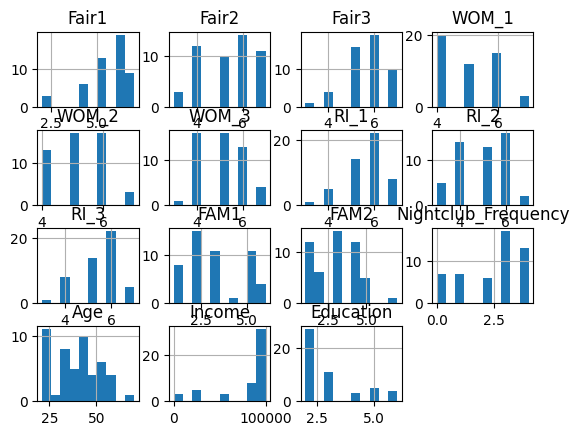

In [ ]:
encoded_df0[numeric_cols].hist()
plt.show()

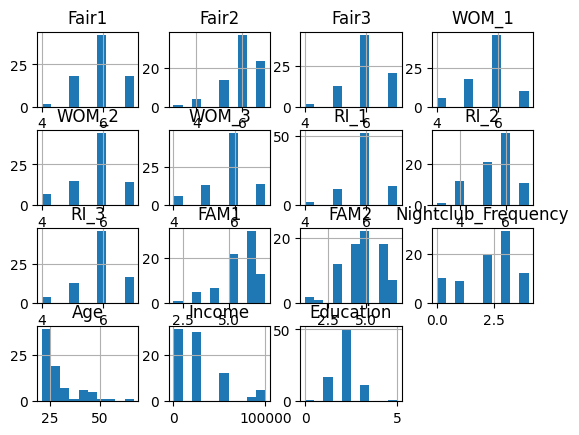

In [ ]:
encoded_df1[numeric_cols].hist()
plt.show()

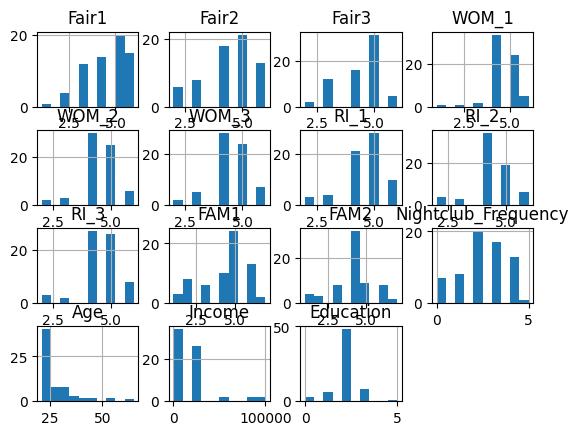

In [ ]:
encoded_df2[numeric_cols].hist()
plt.show()

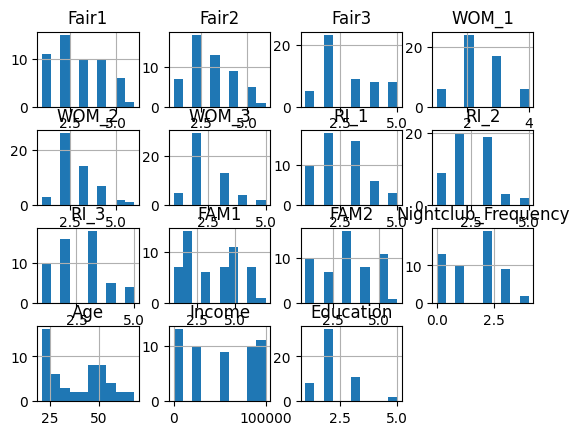

In [ ]:
encoded_df3[numeric_cols].hist()
plt.show()

In [ ]:
#Perform One Hot Encoding for all remaining Catergorical Data
hot_encoded_df = pd.get_dummies(encoded_df, columns=categorical_cols, dtype='int', drop_first=True)
hot_encoded_df.head()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Age,Income,Education,KProto_Labels,CustomerType_Frequent customer,Pricing_Strategy_Flat pricing,Pricing_Strategy_Reservation in advance,Pricing_Strategy_Time of a day,Pricing_Strategy_VIP entrance,Gender_Male,Ethnicity_asian,Ethnicity_caucasian,Ethnicity_hispanic,Ethnicity_native american,Ethnicity_other,Ethnicity_pacific islander,Employment_status_Part time employed,Employment_status_Retired,Employment_status_Student,Employment_status_Unemployed
0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,3,21.0,50000,2,3,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,1,35.0,0,2,3,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,1,26.0,0,2,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,4.0,3.0,2.0,3.0,3.0,1.0,5.0,3.0,5.0,3.0,3.0,2,27.0,50000,3,3,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,5.0,6.0,5.0,1.0,2.0,1.0,2.0,3.0,4.0,5.0,5.0,0,54.0,0,2,3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Normalize the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(hot_encoded_df.drop(columns=['KProto_Labels'], errors='ignore')), columns=hot_encoded_df.drop(columns=['KProto_Labels'], errors='ignore').columns)
#Divide Hot Encoded Data by Number of Categories - 1
scaled_df[list(scaled_df.columns[16:20])] = scaled_df[list(scaled_df.columns[16:20])]/4
scaled_df[list(scaled_df.columns[21:27])] = scaled_df[list(scaled_df.columns[21:27])]/6
scaled_df[list(scaled_df.columns[27:31])] = scaled_df[list(scaled_df.columns[27:31])]/4
scaled_df.head()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Age,Income,Education,CustomerType_Frequent customer,Pricing_Strategy_Flat pricing,Pricing_Strategy_Reservation in advance,Pricing_Strategy_Time of a day,Pricing_Strategy_VIP entrance,Gender_Male,Ethnicity_asian,Ethnicity_caucasian,Ethnicity_hispanic,Ethnicity_native american,Ethnicity_other,Ethnicity_pacific islander,Employment_status_Part time employed,Employment_status_Retired,Employment_status_Student,Employment_status_Unemployed
0,-1.670740,-1.696406,-1.818292,-2.396881,-2.503050,-2.339961,-1.759293,-0.947391,-2.399750,-1.307140,-1.183351,0.629048,-0.944737,0.319477,-0.211032,0.995992,-0.123744,-0.125314,0.498748,-0.125314,1.070772,-0.021296,0.108379,-0.080394,-0.021296,-0.023858,-0.014997,-0.079753,-0.065512,0.276498,-0.048412
1,-2.275412,-2.309476,-2.457776,-2.396881,-2.503050,-2.339961,-2.388695,-2.280162,-2.399750,-0.161091,-0.544188,-0.921774,0.190119,-0.976123,-0.211032,0.995992,-0.123744,-0.125314,-0.125314,0.498748,-0.933906,-0.021296,-0.256302,-0.080394,-0.021296,1.164283,-0.014997,-0.079753,0.954021,-0.226042,-0.048412
2,-2.275412,-2.309476,-2.457776,-2.396881,-2.503050,-2.339961,-2.388695,-2.280162,-2.399750,-0.161091,-0.544188,-0.921774,-0.539431,-0.976123,-0.211032,0.995992,-0.123744,-0.125314,-0.125314,0.498748,-0.933906,-0.021296,-0.256302,-0.080394,-0.021296,-0.023858,1.852176,-0.079753,0.954021,-0.226042,-0.048412
3,-0.461396,-1.083336,-1.818292,-1.043540,-1.134752,-2.339961,0.128914,-0.947391,0.162041,-0.734115,-0.544188,-0.146363,-0.458370,0.319477,0.819302,0.995992,0.505076,-0.125314,-0.125314,-0.125314,1.070772,-0.021296,-0.256302,0.345522,-0.021296,-0.023858,-0.014997,-0.079753,-0.065512,-0.226042,-0.048412
4,0.143276,0.755873,0.100160,-2.396881,-1.818901,-2.339961,-1.759293,-0.947391,-0.478407,0.411933,0.734140,-1.697185,1.730281,-0.976123,-0.211032,-1.004024,0.505076,-0.125314,-0.125314,-0.125314,1.070772,-0.021296,0.108379,-0.080394,-0.021296,-0.023858,-0.014997,-0.079753,-0.065512,0.276498,-0.048412


Number of clusters: 2, Silhouette Score: 0.28736856789890175
Number of clusters: 3, Silhouette Score: 0.12179682137573984
Number of clusters: 4, Silhouette Score: 0.11662838449086894
Number of clusters: 5, Silhouette Score: 0.08100924998354268
Number of clusters: 6, Silhouette Score: 0.08620254193573157
Number of clusters: 7, Silhouette Score: 0.0720808950843352
Number of clusters: 8, Silhouette Score: 0.07621281748792126
Number of clusters: 9, Silhouette Score: 0.08151238250602785
Number of clusters: 10, Silhouette Score: 0.0748062789077545
Best number of clusters: 2, Best Silhouette Score: 0.28736856789890175


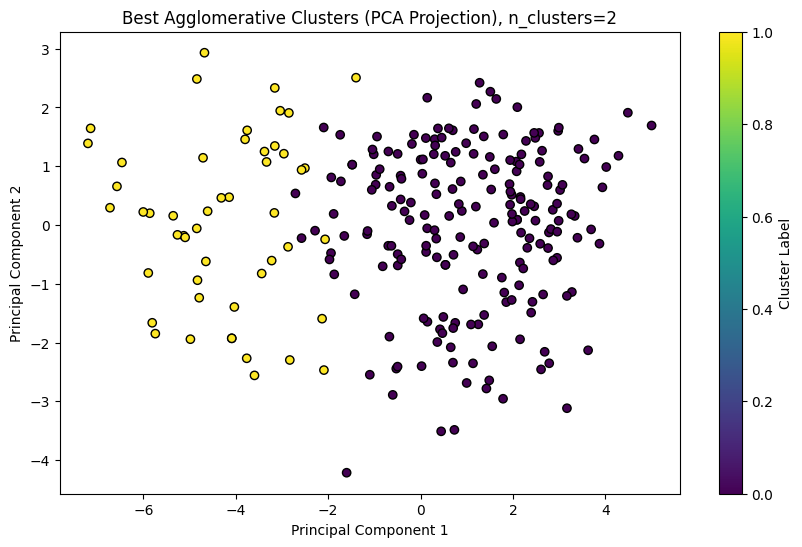

In [ ]:

# Initialize variables to store best silhouette score and best number of clusters
best_silhouette_score = -1
best_n_clusters = 0
best_clusters = None

# Test different numbers of clusters
for n_clusters in range(2, 11):  # Try cluster sizes from 2 to 10
    with contextlib.redirect_stdout(None):
        agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
        agg_clusters = agg_cluster.fit_predict(scaled_df)
    # Calculate the silhouette score
    silhouette_avg_agg = silhouette_score(scaled_df, agg_clusters)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg_agg}')

    # Update best silhouette score and cluster labels
    if silhouette_avg_agg > best_silhouette_score:
        best_silhouette_score = silhouette_avg_agg
        best_n_clusters = n_clusters
        best_clusters = agg_clusters

print(f'Best number of clusters: {best_n_clusters}, Best Silhouette Score: {best_silhouette_score}')

# Add the best Agglomerative cluster labels to the DataFrames
encoded_df['Agg_Labels'] = best_clusters

# Perform PCA for visualization (reduce to 2 principal components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Add PCA results to the DataFrame for plotting
encoded_df['Agg_PC1'] = pca_result[:, 0]
encoded_df['Agg_PC2'] = pca_result[:, 1]

# Plot the clusters with the best silhouette score
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df['Agg_PC1'], encoded_df['Agg_PC2'], c=encoded_df['Best_Agg_Cluster_Labels'], cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Best Agglomerative Clusters (PCA Projection), n_clusters={best_n_clusters}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()